<a href="https://colab.research.google.com/github/fmonteci/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda["Precio"].describe()


,Precio
count,2359.00
mean,487867.91
std,614686.77
min,7600.00
25%,55750.00
50%,235300.00
75%,678100.00
max,2977000.00


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda2["Precio"].describe()


,Precio
count,2359.00
mean,473227.43
std,595559.55
min,7600.00
25%,54550.00
50%,218200.00
75%,677700.00
max,2953400.00


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda3["Precio"].describe()


,Precio
count,2359.00
mean,465459.77
std,580643.39
min,7600.00
25%,57400.00
50%,226300.00
75%,666050.00
max,2968200.00


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda4['Precio'].describe()

,Precio
count,2358.00
mean,440362.89
std,568755.60
min,7600.00
25%,53400.00
50%,209450.00
75%,634225.00
max,2902200.00


In [6]:
VtotaleTienda= tienda['Precio'].sum()
VtotaleTienda2=tienda2['Precio'].sum()
VtotaleTienda3=tienda3['Precio'].sum()
VtotaleTienda4=tienda4['Precio'].sum()

print(f"ventas totales tienda: {VtotaleTienda}\nventas totales tienda2: {VtotaleTienda2}\nventas totales tienda3: {VtotaleTienda3}\nventas totales tienda4: {VtotaleTienda4}")

ventas totales tienda: 1150880400.0
ventas totales tienda2: 1116343500.0
ventas totales tienda3: 1098019600.0
ventas totales tienda4: 1038375700.0


**Respuesta**

- La facturación total de tienda es de **$1150880400.0**

  - La facturación promedio de tienda es **$487867.91**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es 7600 y su max 2977000.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 55750.00 y q3: 678100.00.

- La facturación total de tienda2 es de  **$1116343500.0**

  - La facturación promedio de tienda 2 es de  **$473227.43**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es de 7600 y su max es de 2953400.00.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 54550.00 y q3: 677700.00

- la facturación total de tienda3 es de **$1098019600.0**

  - La facturación promedio de tienda 3 es de **$465459.77**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es de 7600 y su max de 2968200.00.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 57400.00 y q3: 666050.00

- la facturación total de tienda 4 es de **$1038375700.0**

  - La facturación promedio de tienda 4 es de **$440362.89**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es de 7600 y su max de 2902200.00.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 53400.00 y q3: 634225.00




# 2. Ventas por categoría

In [7]:
conteo = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
conteo2=tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
conteo3=tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
conteo4=tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
print(conteo)
print(f"el maximo {max(conteo['Cantidad'])}, el min {min(conteo['Cantidad'])}")
print(f"***************************************\n {conteo2}")
print(f"el maximo {max(conteo2['Cantidad'])}, el min {min(conteo2['Cantidad'])}")
print(f"***************************************\n {conteo3}")
print(f"el maximo {max(conteo3['Cantidad'])}, el min {min(conteo3['Cantidad'])}")
print(f"***************************************\n {conteo4}")
print(f"el maximo {max(conteo4['Cantidad'])}, el min {min(conteo4['Cantidad'])}")

    Categoría del Producto  Cantidad
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465
el maximo 465, el min 171
***************************************
     Categoría del Producto  Cantidad
0  Artículos para el hogar       181
1     Deportes y diversión       275
2        Electrodomésticos       305
3             Electrónicos       422
4   Instrumentos musicales       224
5                 Juguetes       313
6                   Libros       197
7                  Muebles       442
el maximo 442, el min 181
***************************************
     Categoría del Producto  Cantidad
0  Artículos para el hogar       177
1     Deportes y diversión       277
2        Electrodomésticos       278
3             Electrónicos       451
4   Instrumento

In [33]:
print(f"Cantidad de ventas Tienda 1: {tienda.shape}\nCantidad de ventas Tienda 2: {tienda2.shape}\nCantidad de ventas Tienda 3: {tienda3.shape}\nCantidad de ventas Tienda 4: {tienda4.shape}")

Cantidad de ventas Tienda 1: (2359, 13)
Cantidad de ventas Tienda 2: (2359, 13)
Cantidad de ventas Tienda 3: (2359, 13)
Cantidad de ventas Tienda 4: (2358, 13)


**Respuesta**

- La categoria con mayor cantidad de productos vendidos en tienda es muebles con 465 ventas y la categoria con menos cantidad de ventas es Artículos para el Hogar con 171 ventas
- La categoria con mayor cantidad de productos vendidos en tienda2 es muebles con 442 ventas y la categoria con menos cantidad de ventas es Artículos para el Hogar con 181 ventas
- La categoria con mayor cantidad de productos vendidos en tienda3 es muebles con 499 ventas y las categorias con menos cantidad de ventas son Artículos para el Hogar e Instrumentos Musicales con 177 ventas
- La categoria con mayor cantidad de productos vendidos en tienda4 es muebles con 480 ventas y la categoria con menos cantidad de ventas es Instrumentos Musicales con 170 ventas

# 3. Calificación promedio de la tienda


In [8]:
SatisfaccionTienda=tienda['Calificación'].mean()
SatisfaccionTienda2=tienda2['Calificación'].mean()
SatisfaccionTienda3=tienda3['Calificación'].mean()
SatisfaccionTienda4=tienda4['Calificación'].mean()
print(f"la Satisfacción promedio de tienda es: {SatisfaccionTienda}")
print(f"la Satisfacción promedio de tienda2 es: {SatisfaccionTienda}")
print(f"la Satisfacción promedio de tienda3 es: {SatisfaccionTienda3}")
print(f"la Satisfacción promedio de tienda4 es: {SatisfaccionTienda4}")

la Satisfacción promedio de tienda es: 3.976685036032217
la Satisfacción promedio de tienda2 es: 3.976685036032217
la Satisfacción promedio de tienda3 es: 4.048325561678677
la Satisfacción promedio de tienda4 es: 3.9957591178965224


# 4. Productos más y menos vendidos

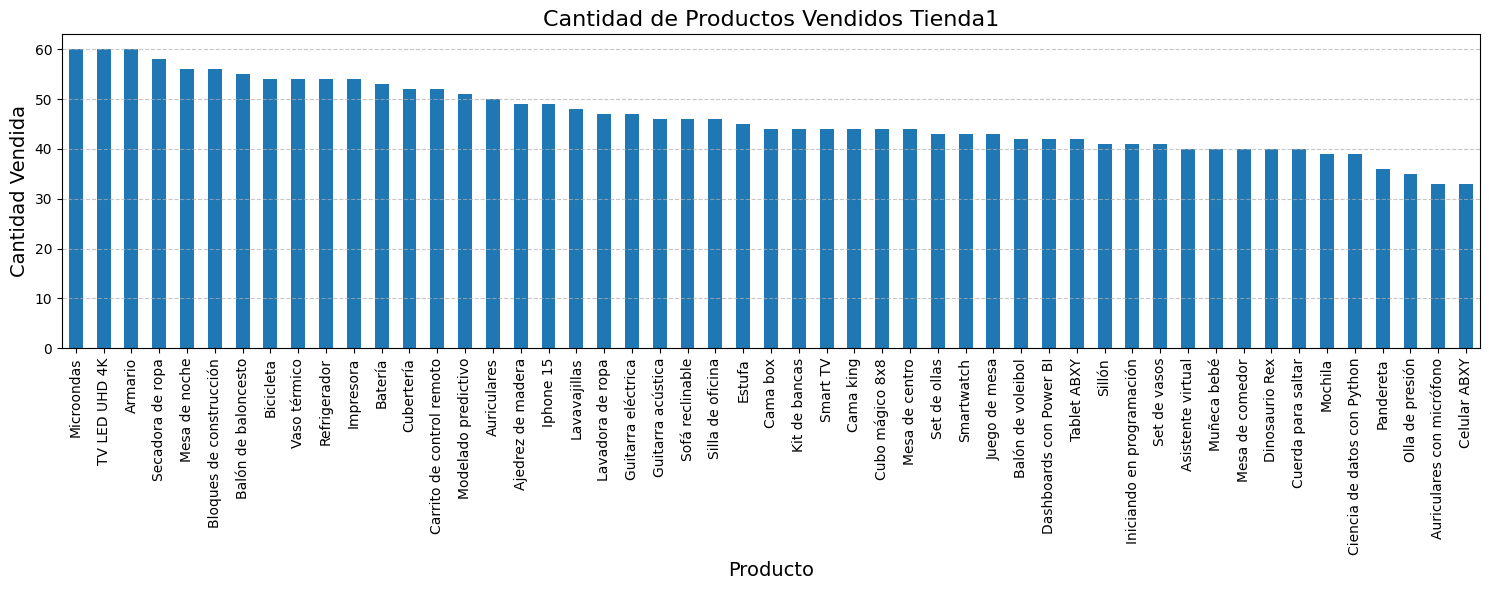

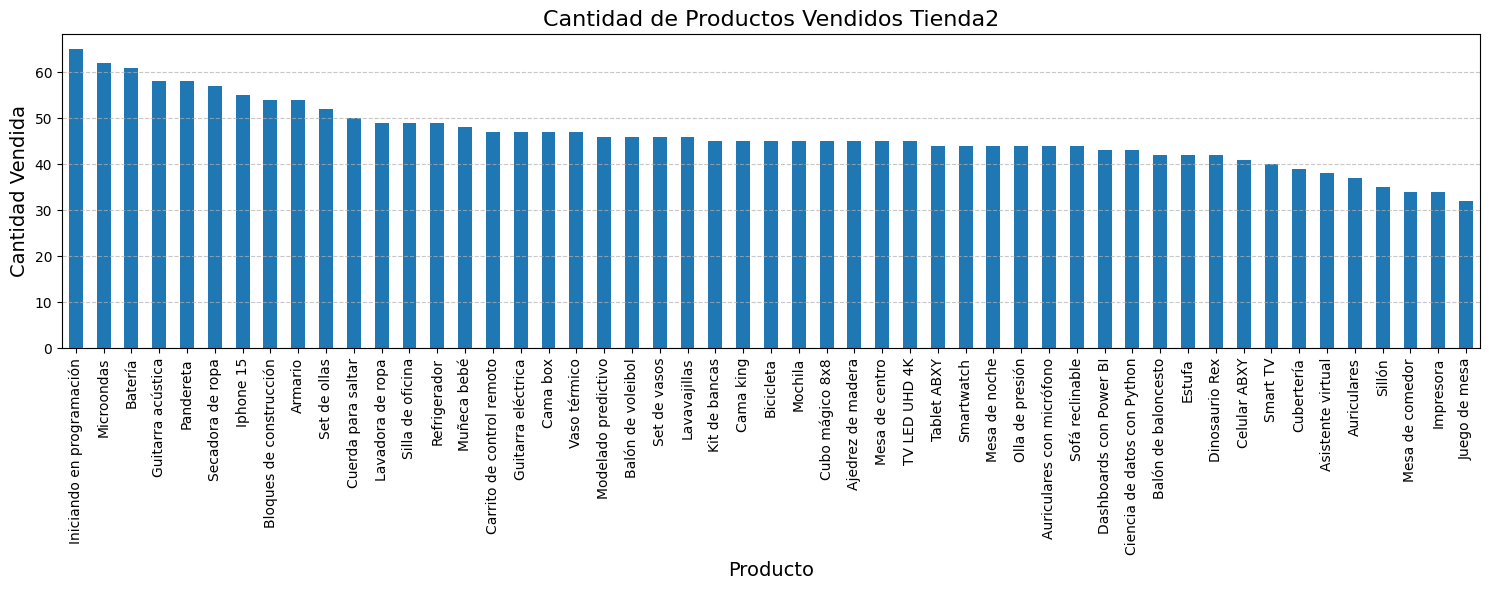

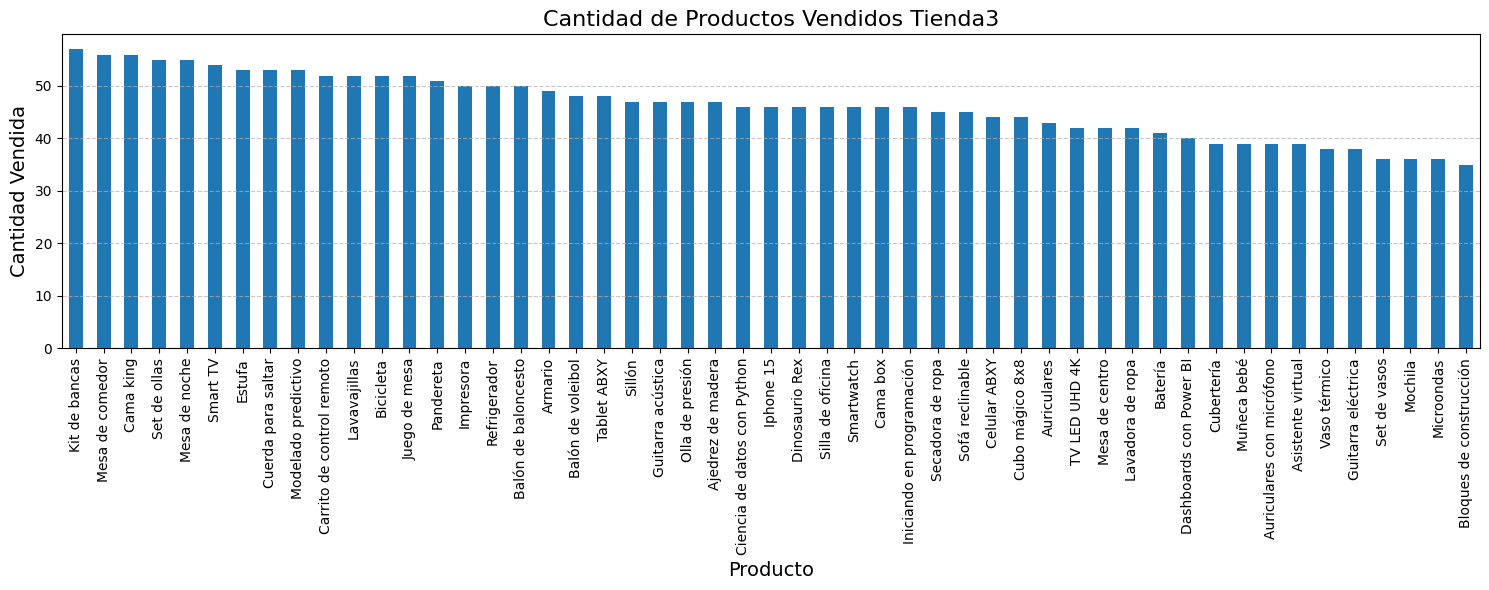

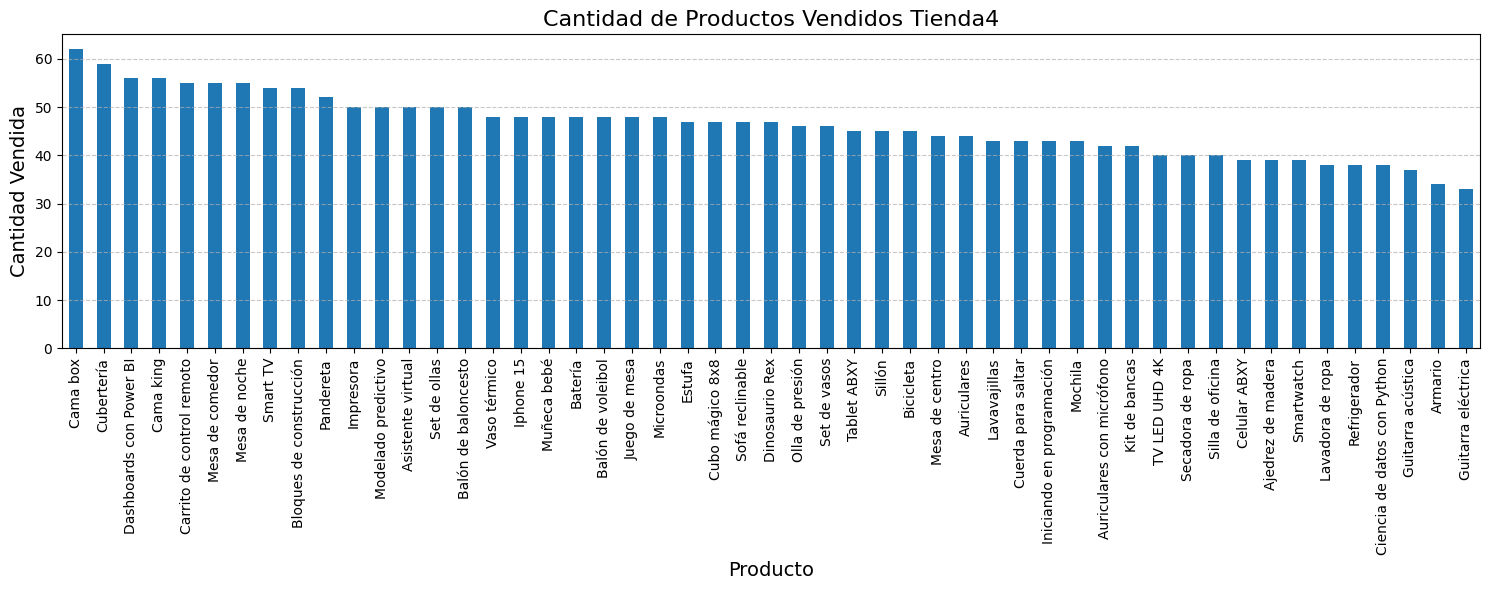

In [44]:
import matplotlib.pyplot as plt

conteo_productos = tienda['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda1', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


conteo_productos2 = tienda2['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos2.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda2', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

conteo_productos3 = tienda3['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos3.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda3', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

conteo_productos4 = tienda4['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos4.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda4', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
tienda4['Producto'].value_counts()

,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55
Mesa de comedor,55
Mesa de noche,55
Smart TV,54
Bloques de construcción,54


In [35]:
tienda['Producto'].value_counts()

,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


In [36]:
tienda2['Producto'].value_counts()

,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58
Secadora de ropa,57
Iphone 15,55
Bloques de construcción,54
Armario,54


In [37]:
tienda3['Producto'].value_counts()

,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Smart TV,54
Estufa,53
Cuerda para saltar,53
Modelado predictivo,53


In [41]:
tienda4['Producto'].value_counts()

,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55
Mesa de comedor,55
Mesa de noche,55
Smart TV,54
Bloques de construcción,54


# 5. Envío promedio por tienda

In [49]:
ce1=tienda['Costo de envío'].mean()
ce2=tienda2['Costo de envío'].mean()
ce3=tienda3['Costo de envío'].mean()
ce4=tienda4['Costo de envío'].mean()
print(f"el costo de envio promedio de tienda 1 es: {ce1}\nel costo de envio promedio de tienda 2 es: {ce2}\nel costo de envio promedio de tienda 3 es: {ce3}\nel costo de envio promedio de tienda 4 es {ce4}")

el costo de envio promedio de tienda 1 es: 26018.60958033065
el costo de envio promedio de tienda 2 es: 25216.235693090293
el costo de envio promedio de tienda 3 es: 24805.680373039424
el costo de envio promedio de tienda 4 es 23459.457167090754


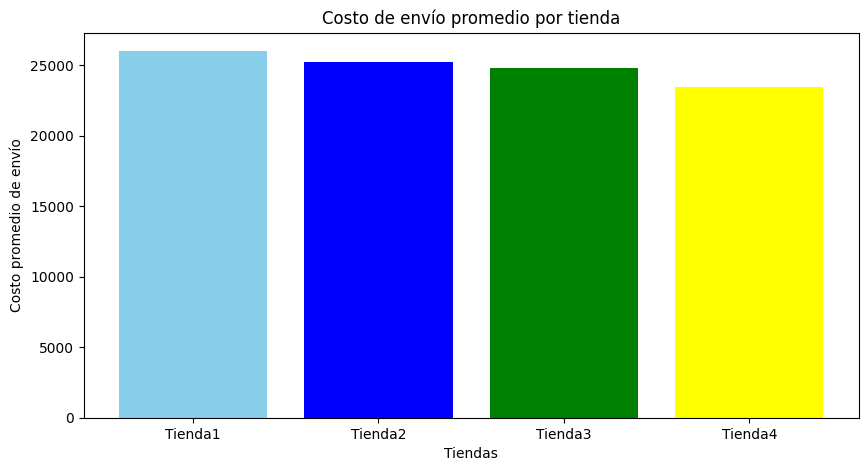

In [54]:
fig,ax=plt.subplots(figsize=(10,5))
ax.bar("Tienda1",ce1,color="Skyblue",label="Tienda 1")
ax.bar("Tienda2",ce2,color="blue",label="Tienda 2")
ax.bar("Tienda3",ce3,color="green",label="Tienda 3")
ax.bar("Tienda4",ce4,color="yellow",label="Tienda 4")
ax.title.set_text("Costo de envío promedio por tienda")
ax.set_xlabel("Tiendas")
ax.set_ylabel("Costo promedio de envío")

plt.show()

#Gráficos

In [ ]:
import matplotlib.pyplot as plt


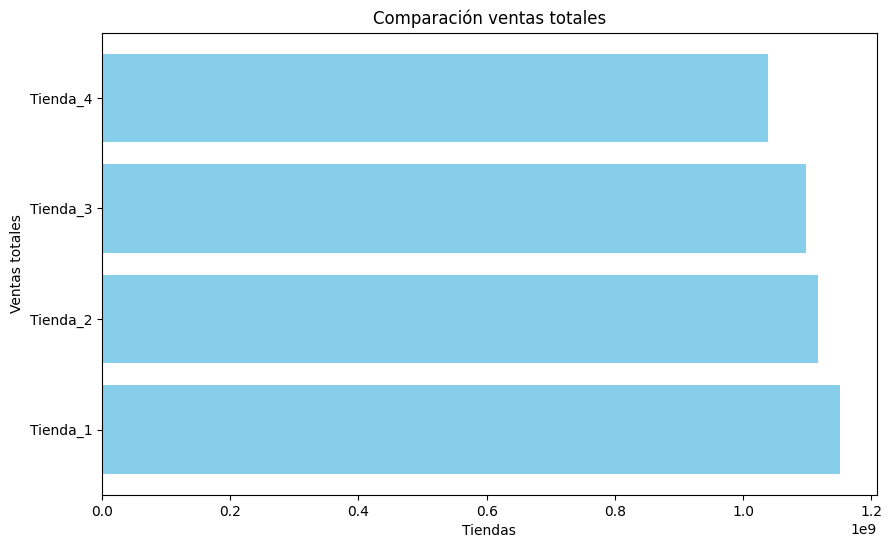

In [29]:

Tiendas=["Tienda_1","Tienda_2","Tienda_3","Tienda_4"]
Ventas_Totales=[VtotaleTienda,VtotaleTienda2,VtotaleTienda3,VtotaleTienda4]
plt.figure(figsize=(10,6))
plt.barh(Tiendas,Ventas_Totales,color="Skyblue")

plt.title("Comparación ventas totales")
plt.xlabel("Tiendas")
plt.ylabel("Ventas totales")
plt.grid(False, axis="y")
plt.show()

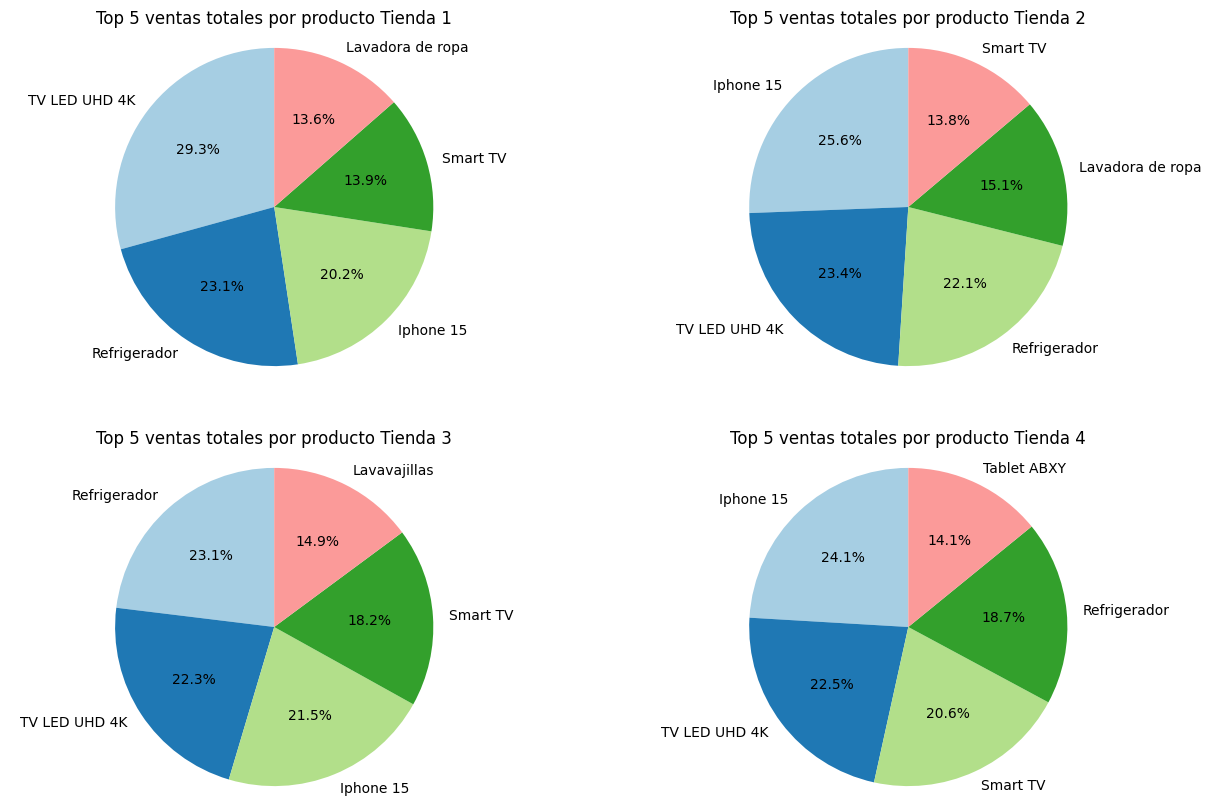

In [15]:
vtasxtipot1=tienda.groupby("Producto")["Precio"].sum()
vtasxtipot2=tienda2.groupby("Producto")["Precio"].sum()
vtasxtipot3=tienda3.groupby("Producto")["Precio"].sum()
vtasxtipot4=tienda4.groupby("Producto")["Precio"].sum()
orden1=vtasxtipot1.sort_values(ascending=False)
orden2=vtasxtipot2.sort_values(ascending=False)
orden3=vtasxtipot3.sort_values(ascending=False)
orden4=vtasxtipot4.sort_values(ascending=False)
top5T1=orden1.head(5)
top5T2=orden2.head(5)
top5T3=orden3.head(5)
top5T4=orden4.head(5)

otros1=orden1.iloc[5:].sum()
otros2=orden2.iloc[5:].sum()
otros3=orden3.iloc[5:].sum()
otros4=orden4.iloc[5:].sum()




fig,ax=plt.subplots(2,2,figsize=(15,10))


ax[0,0].pie(top5T1, labels=top5T1.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[0,0].set_title("Top 5 ventas totales por producto Tienda 1")
ax[0,0].axis("equal")


ax[0,1].pie(top5T2, labels=top5T2.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[0,1].set_title("Top 5 ventas totales por producto Tienda 2")
ax[0,1].axis("equal")


ax[1,0].pie(top5T3, labels=top5T3.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[1,0].set_title("Top 5 ventas totales por producto Tienda 3")
ax[1,0].axis("equal")


ax[1,1].pie(top5T4, labels=top5T4.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[1,1].set_title("Top 5 ventas totales por producto Tienda 4")
ax[1,1].axis("equal")

plt.show()

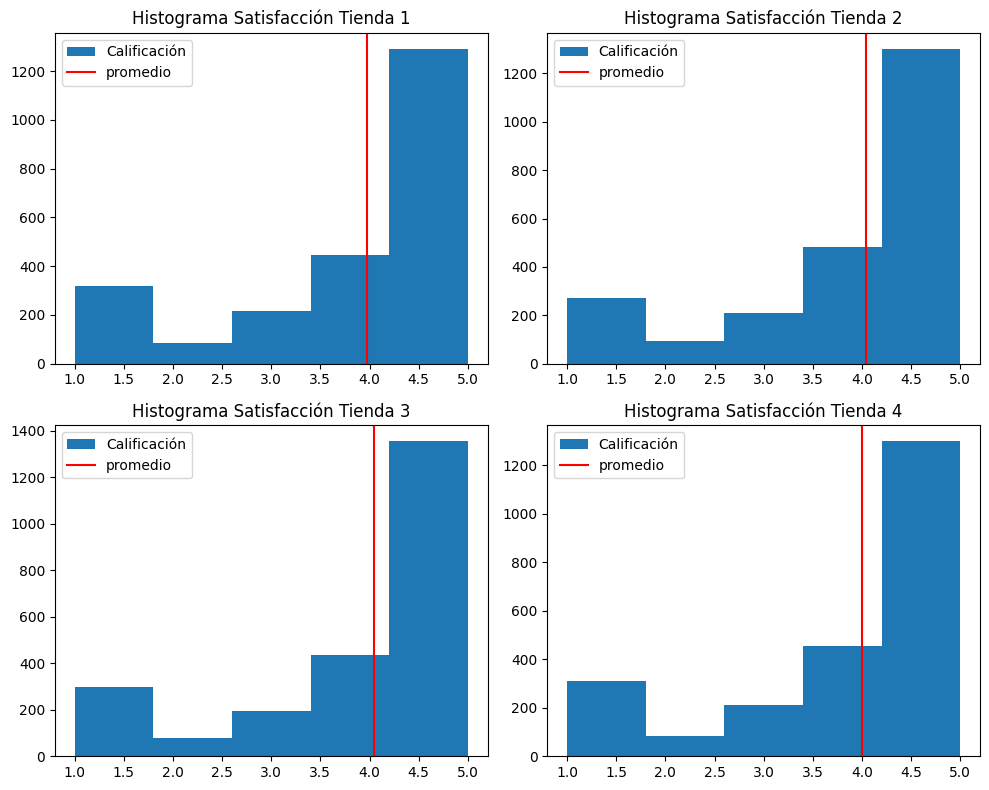

promedio tienda 1 3.976685036032217
promedio tienda 2 4.037303942348453
promedio tienda 3 4.048325561678677
promedio tienda 4 3.9957591178965224


In [45]:
#Histograma calcificaciones
cal=tienda['Calificación'].mean()
cal2=tienda2['Calificación'].mean()
cal3=tienda3['Calificación'].mean()
cal4=tienda4['Calificación'].mean()

fig, axs=plt.subplots(2,2, figsize=(10,8))
axs[0,0].hist(tienda["Calificación"], bins=5, label="Calificación")
axs[0,0].axvline(cal,color="red",linestyle="-", label="promedio")
axs[0,0].set_title("Histograma Satisfacción Tienda 1")
axs[0,0].legend()
axs[0,1].hist(tienda2["Calificación"], bins=5, label="Calificación")
axs[0,1].axvline(cal2,color="red",linestyle="-", label="promedio")
axs[0,1].legend()
axs[0,1].set_title("Histograma Satisfacción Tienda 2")
axs[1,0].hist(tienda3["Calificación"], bins=5, label="Calificación")
axs[1,0].axvline(cal3,color="red",linestyle="-", label="promedio")
axs[1,0].legend()
axs[1,0].set_title("Histograma Satisfacción Tienda 3")
axs[1,1].hist(tienda4["Calificación"], bins=5, label="Calificación")
axs[1,1].axvline(cal4,color="red",linestyle="-", label="promedio")
axs[1,1].legend()
axs[1,1].set_title("Histograma Satisfacción Tienda 4")
plt.tight_layout()
plt.show()



print(f"promedio tienda 1 {cal}\npromedio tienda 2 {cal2}\npromedio tienda 3 {cal3}\npromedio tienda 4 {cal4}")

In [ ]:
#histograma tipo de pago

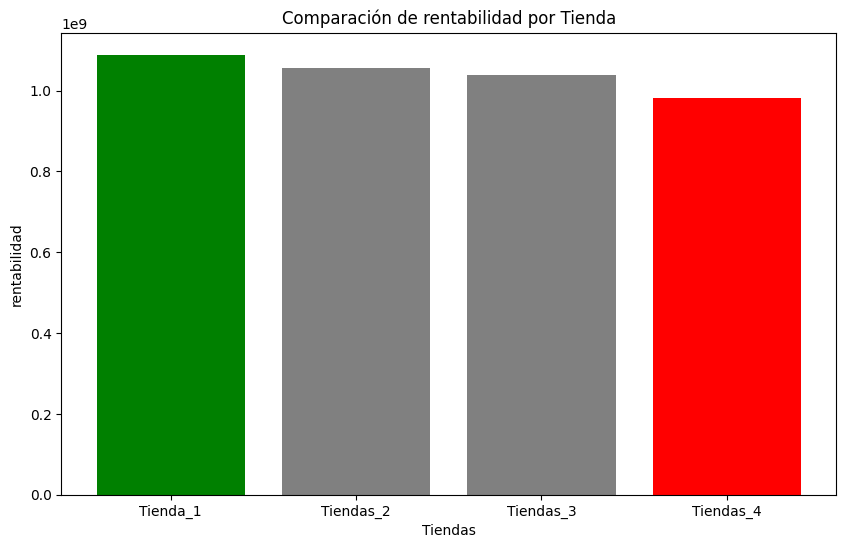

Rentabilidad Tienda 1: 1089502500.0
Rentabilidad Tienda 2: 1056858400.0
Rentabilidad Tienda 3: 1039503000.0
Rentabilidad Tienda 4: 983058300.0


In [56]:
#rentabilidad por tienda

tienda["Rentabilidad"]=tienda['Precio']-tienda["Costo de envío"]
rentabilidad=tienda["Rentabilidad"].sum()
tienda2["Rentabilidad"]=tienda2['Precio']-tienda2["Costo de envío"]
rentabilidad2=tienda2["Rentabilidad"].sum()
tienda3["Rentabilidad"]=tienda3['Precio']-tienda3["Costo de envío"]
rentabilidad3=tienda3["Rentabilidad"].sum()
tienda4["Rentabilidad"]=tienda4['Precio']-tienda4["Costo de envío"]
rentabilidad4=tienda4["Rentabilidad"].sum()


plt.figure(figsize=(10,6))
plt.bar("Tienda_1",rentabilidad,color="green")
plt.bar("Tiendas_2",rentabilidad2,color="grey")
plt.bar("Tiendas_3",rentabilidad3,color="grey")
plt.bar("Tiendas_4",rentabilidad4,color="red")


plt.title("Comparación de rentabilidad por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("rentabilidad")
plt.grid(False)
plt.show()

print(f"Rentabilidad Tienda 1: {rentabilidad}\nRentabilidad Tienda 2: {rentabilidad2}\nRentabilidad Tienda 3: {rentabilidad3}\nRentabilidad Tienda 4: {rentabilidad4}")

In [70]:
cat=tienda["Categoría del Producto"].unique()
Tiendas=["Tienda_1","Tienda_2","Tienda_3","Tienda_4"]
color_t=["green","red","blue","yellow"]

In [72]:
consolidado_cat=pd.DataFrame({"Tienda1":tienda['Categoría del Producto'].value_counts(),
                             "Tienda2":tienda2['Categoría del Producto'].value_counts(),
                              "Tienda3":tienda3['Categoría del Producto'].value_counts(),
                              "Tienda4":tienda4['Categoría del Producto'].value_counts()})
consolidado_cat

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


In [73]:
consolidado_cat.reindex(cat)

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Electrónicos,448,422,451,451
Muebles,465,442,499,480
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Libros,173,197,185,187
Instrumentos musicales,182,224,177,170


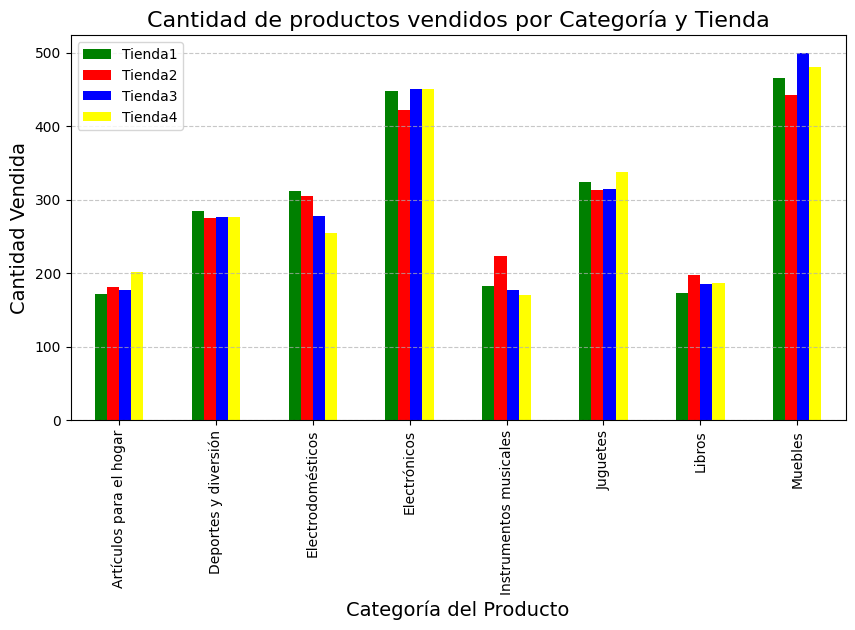

In [74]:
ax=consolidado_cat.plot(kind="bar", figsize=(10,5), color=color_t)
plt.title("Cantidad de productos vendidos por Categoría y Tienda", fontsize=16)
plt.xlabel("Categoría del Producto", fontsize=14)
plt.ylabel("Cantidad Vendida", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [75]:
Consolidad_ventas_cat=pd.DataFrame({"Tienda1":tienda.groupby("Categoría del Producto")["Precio"].sum(),
                                   "Tienda2":tienda2.groupby("Categoría del Producto")["Precio"].sum(),
                                    "Tienda3":tienda3.groupby("Categoría del Producto")["Precio"].sum(),
                                    "Tienda4":tienda4.groupby("Categoría del Producto")["Precio"].sum()})
Consolidad_ventas_cat

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Artículos para el hogar,12698400.00,14746900.00,15060000.00,15074500.00
Deportes y diversión,39290000.00,34744500.00,35593100.00,33350100.00
Electrodomésticos,363685200.00,348567800.00,329237900.00,283260200.00
Electrónicos,429493500.00,410831100.00,410775800.00,409476100.00
Instrumentos musicales,91299000.00,104990300.00,77380900.00,75102400.00
Juguetes,17995700.00,15945400.00,19401100.00,20262200.00
Libros,8784900.00,10091200.00,9498700.00,9321300.00
Muebles,187633700.00,176426300.00,201072100.00,192528900.00


In [76]:
Consolidad_ventas_cat.reindex(cat)

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Electrónicos,429493500.00,410831100.00,410775800.00,409476100.00
Muebles,187633700.00,176426300.00,201072100.00,192528900.00
Juguetes,17995700.00,15945400.00,19401100.00,20262200.00
Electrodomésticos,363685200.00,348567800.00,329237900.00,283260200.00
Artículos para el hogar,12698400.00,14746900.00,15060000.00,15074500.00
Deportes y diversión,39290000.00,34744500.00,35593100.00,33350100.00
Libros,8784900.00,10091200.00,9498700.00,9321300.00
Instrumentos musicales,91299000.00,104990300.00,77380900.00,75102400.00


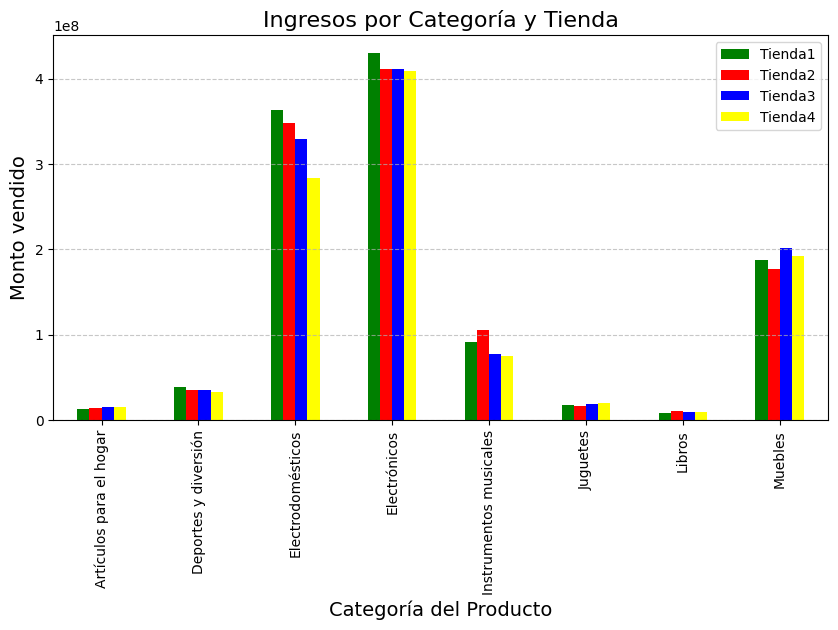

In [78]:
ax=Consolidad_ventas_cat.plot(kind="bar", figsize=(10,5), color=color_t)
plt.title("Ingresos por Categoría y Tienda", fontsize=16)
plt.xlabel("Categoría del Producto", fontsize=14)
plt.ylabel("Monto vendido", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Informe Final (recomendación)**
Metodología, para las variables numéricas se establece un sistema de ranking otorgando 4 pts a la tienda con mejor desempeño en cada variable.
Las variables analizadas en este apartado son:
* Ingresos Totales
* Rentabilidad por Tienda
* Costo de Envío Promedio
* Calificación Promedio (Satisfacción)

Para las variables categóricas  aplicaremos la misma metodología para ingresos por categoría y tienda, acotando a las 2 categorías mas influyentes, electrodomeésticos y electrónicos

## **Variables Numéricas**

### Ingresos Totales
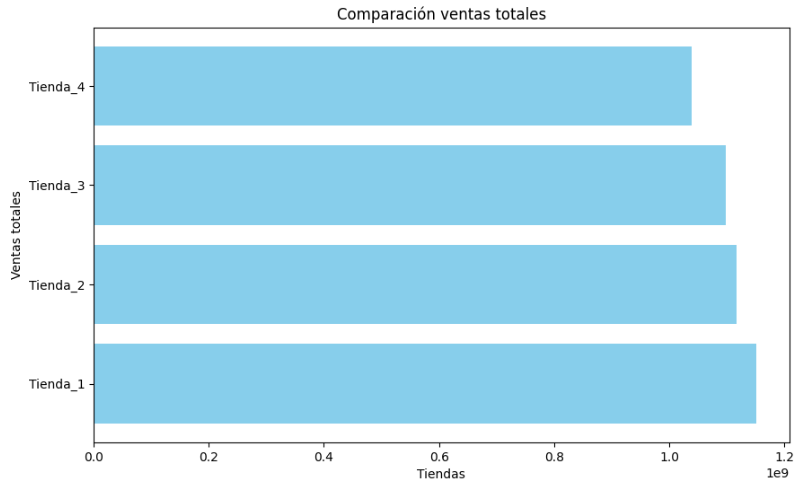

* Ingresos Totales: Observamos que la tienda con mayores ingresos corresponde a la tienda 1 con 1150880400.0 y la tienda con menores ingresos corresponde a la tienda 4 1038375700.0. observandose una brecha de 112504700.0

* Tienda 1: 1150880400.0 (4 pts)
* Tienda 2: 1116343500.0 (3 pts)
* Tienda 3: 1098019600.0 (2 pts)
* Tienda 4: 1038375700.0 (1 pt)

### **Rentabilidad por tienda**

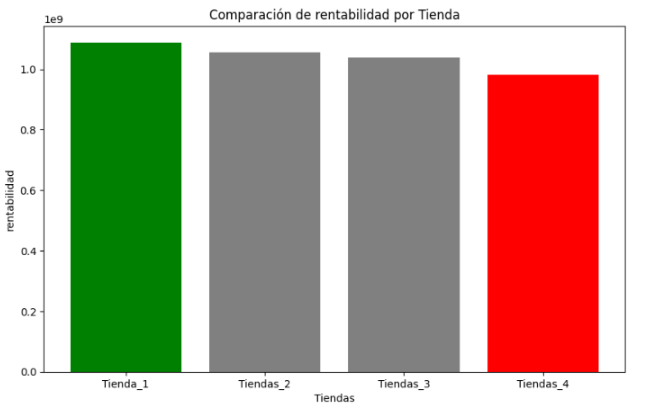

Observando los ingresos totales menos el costo de envío para determinar la rentabilidad total de cada tienda. obtenemos el siguiente detalle:

* Rentabilidad Tienda 1: 1089502500.0 (4 pts)
* Rentabilidad Tienda 2: 1056858400.0 (3 pts)
* Rentabilidad Tienda 3: 1039503000.0 (2 pts)
* Rentabilidad Tienda 4: 983058300.0 (1 pt)

Generandose una brecha de 106444200.0 entre la tienda 1 (max) y la tienda 4 (min)

### Costo de Envio Promedio
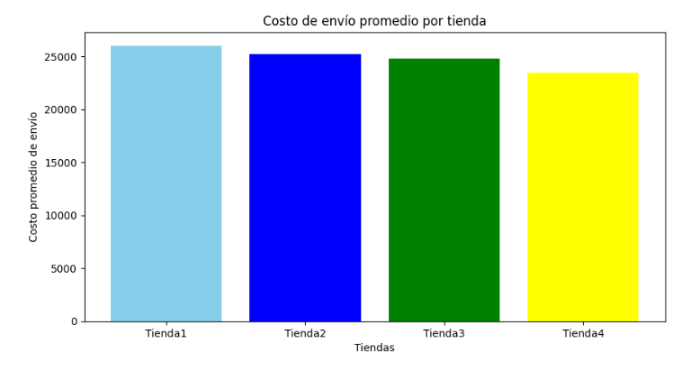

Se observa que la tienda con menores costos de envío corresponde a la tienda 4, generando una diferencia promedio de 2559.152 con la tienda 1 que tiene los mayores costos de envío
* el costo de envio promedio de tienda 1 es: 26018.609 (1 pt)
* el costo de envio promedio de tienda 2 es: 25216.235 (2 pts)
* el costo de envio promedio de tienda 3 es: 24805.680 (3 pts)
* el costo de envio promedio de tienda 4 es 23459.457 (4 pts)

In [81]:
26018.609-23459.457

2559.152000000002

### Calificaciones Promedio (Satifacción)
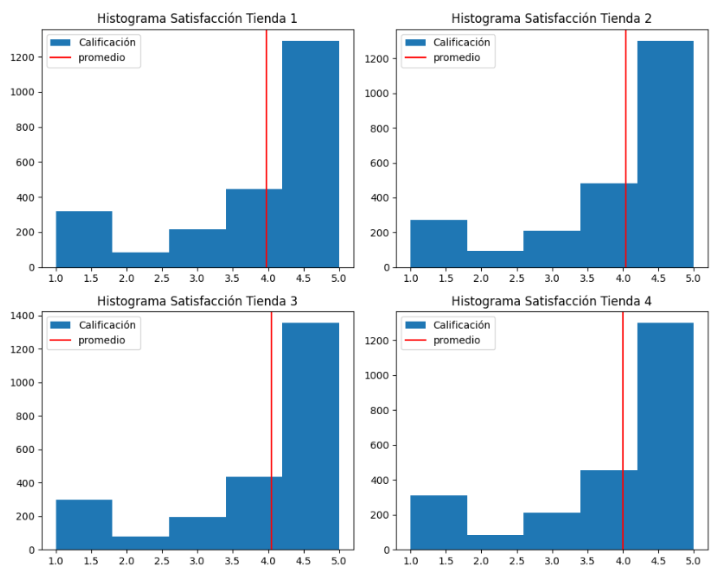

Observamos que la tienda 3 tiene mejor desempeño en cuanto a la satisfacción de los clientes con la mayor cantidad de clientes que evaluan entre 4 y 5.

* Tienda 3, con una calificacion de 4.048 (4 pts)
* Tienda 2, con una calificacion de 4.037 (3 pts)
* Tienda 4, con una calificacion de 3.995 (2 pts)
* Tienda 1, con una calificacion de 3.976 (1 pt)

## **Variables Categóricas**

### **Categorías Más Vendidas**
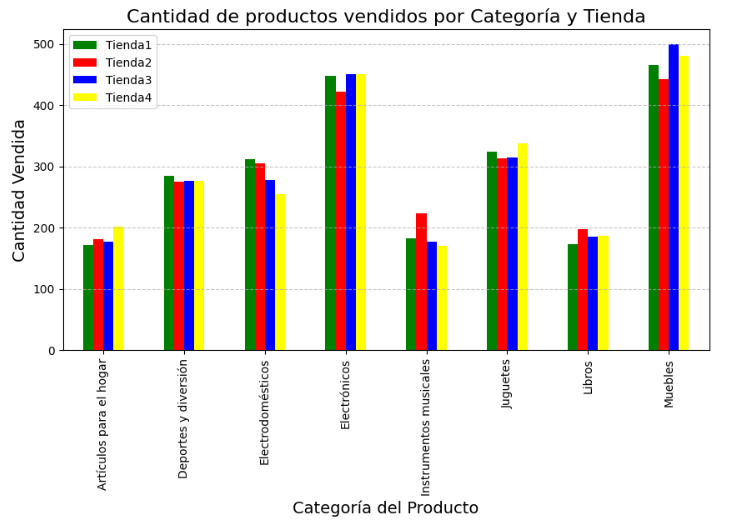

* Puedo apreciar que en este apartado las categorías predominantes son muebles y electrónico, en ambas categórías es la tienda 2 quien tiene peor desempeño

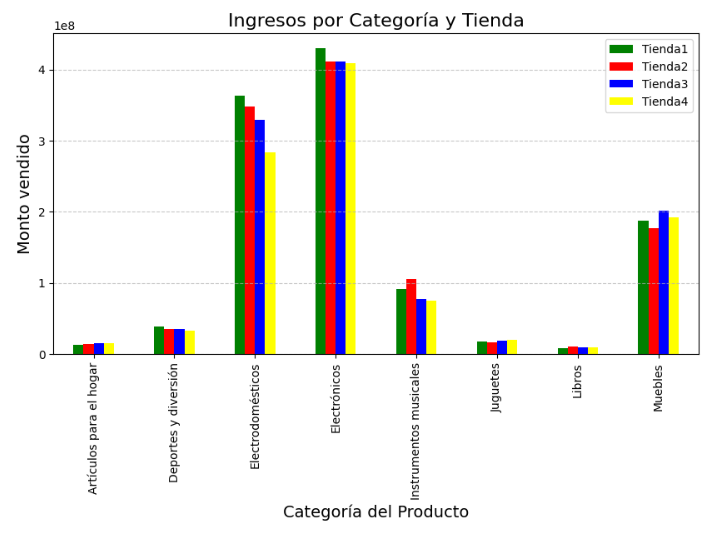

* En cambio si realizamos el analisis por ingresos de categorías observamos que son electrónicos y electrodomésticos las categorías que generan mayores ingresos, muy por sobre las otras categorías, y en ambas categorías predomina la tienda 1 y en ambos casos la tienda 4 cuenta con los peores desempeños

* Categoría Electrodomésticos:

  - Tienda 1: 363685200 (4 pts)
  - Tienda 2: 348567800 (3 pts)
  - Tienda 3: 329237900 (2 pts)
  - Tienda 4: 283260200 (1 pt)

* Categoría Electrónicos:

  - Tienda 1: 429493500 (4 pts)
  - Tienda 2: 410831100 (3 pts)
  - Tienda 3: 410775800 (2 pts)
  - Tienda 4: 409476100 (1 pt)


### **Productos Más y Menos Vendidos**
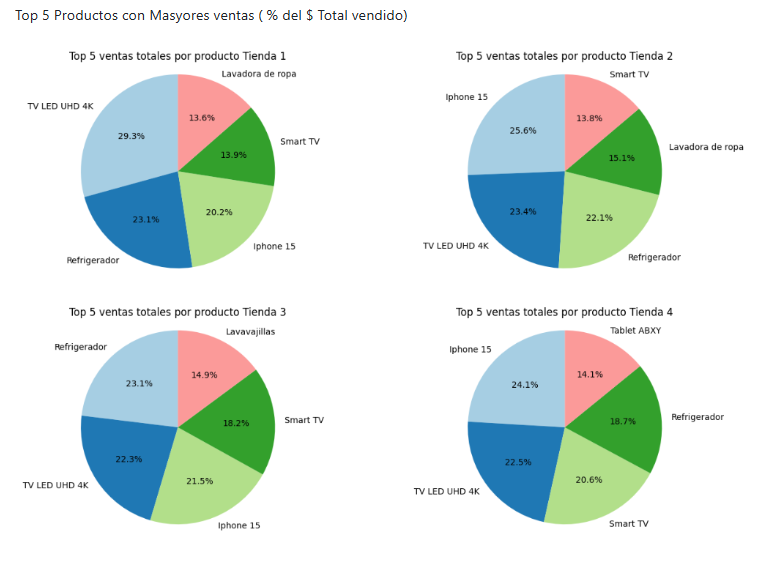

* Observamos que los productos con mayores ingresos en la tienda 1 corresponden a categoría electrodomésticos y electrónicos, siendo televisores led uhd 4k el que genera mayor ingreso
* En la tienda 2 el producto que genera mayores ingresos corresponde a Iphone 15
* En la tienda 3 es Refrigeradores el producto que generá mayores ingresos
* En la Tienda 4 Iphone 15 es el producto con mayores ingresos

**Resumen por volumen de venta por tienda**

*Tienda 1*

* Los 3 Productos más vendidos son Microondas, TV Led Uhd 4k y Armario con 60 unidades vendidas cu.
* Los Productos menos vendidos son Auriculares con micrófono y Celular ABXY con 33 unidades vendidas cu.

*Tienda 2*

* El producto más vendido es Iniciando en programación con 65 unidades vendidas
* El producto Juego de mesa es el menos vendido con 32 unidades vendidas

*Tienda 3*

* El producto más vendido es Kit de bancas con 57 unidades vendidas
* El producto Bloques de construcción es el menos vendido con 35 unidades vendidas

*Tienda 4*

* El producto más vendido es Cama box con 62 unidades vendidas
* El producto Guitarra eléctrica es el menos vendido con 33 unidades vendidas

# Recomendación
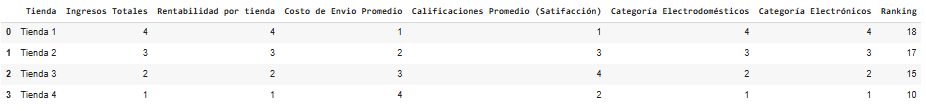
 Agrupando las variables controladas,se obtiene que la tienda con menor puntuación es la tienda 4.
 Es en base a lo anterior que se le recomienda al Sr.  Juan **Vender la Tienda 4**

In [88]:
datos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingresos Totales": [4, 3, 2, 1],
    "Rentabilidad por tienda": [4, 3, 2, 1],
    "Costo de Envio Promedio": [1, 2, 3, 4],
    "Calificaciones Promedio (Satifacción)": [1, 3, 4, 2],
    "Categoría Electrodomésticos": [4, 3, 2, 1],
    "Categoría Electrónicos": [4, 3, 2, 1]
}

ranking_final = pd.DataFrame(datos)
ranking_final["Ranking"] = ranking_final.drop(columns=["Tienda"]).sum(axis=1)
ranking_final = ranking_final.sort_values(by="Ranking", ascending=False).reset_index(drop=True)

ranking_final

,Tienda,Ingresos Totales,Rentabilidad por tienda,Costo de Envio Promedio,Calificaciones Promedio (Satifacción),Categoría Electrodomésticos,Categoría Electrónicos,Ranking
0,Tienda 1,4,4,1,1,4,4,18
1,Tienda 2,3,3,2,3,3,3,17
2,Tienda 3,2,2,3,4,2,2,15
3,Tienda 4,1,1,4,2,1,1,10
